In [1]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data_raw = pd.read_csv("ToyotaCorolla.csv",encoding='latin1') #Note the encoding involved
data = data_raw[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.rename(columns={'Price':'price','Age_08_04':'age', 'KM':'km', 'HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'qtr_tax','Weight':'weight'}, inplace = True)
data.head()

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [2]:
data.info() #There are no missing values in the dataset which is good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    1436 non-null   int64
 1   age      1436 non-null   int64
 2   km       1436 non-null   int64
 3   hp       1436 non-null   int64
 4   cc       1436 non-null   int64
 5   doors    1436 non-null   int64
 6   gears    1436 non-null   int64
 7   qtr_tax  1436 non-null   int64
 8   weight   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [3]:
data.describe() 

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Correlation Analysis

In [4]:
data.corr() 
#Points to note her
    #- Price has good negative relation with age and some relation with KM & Weight(which may not be accurate)
   # - Cases or autocorrelation: Age & KM, Age & Weight, Quaterly_tax & Weight, Weight & Age

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtr_tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


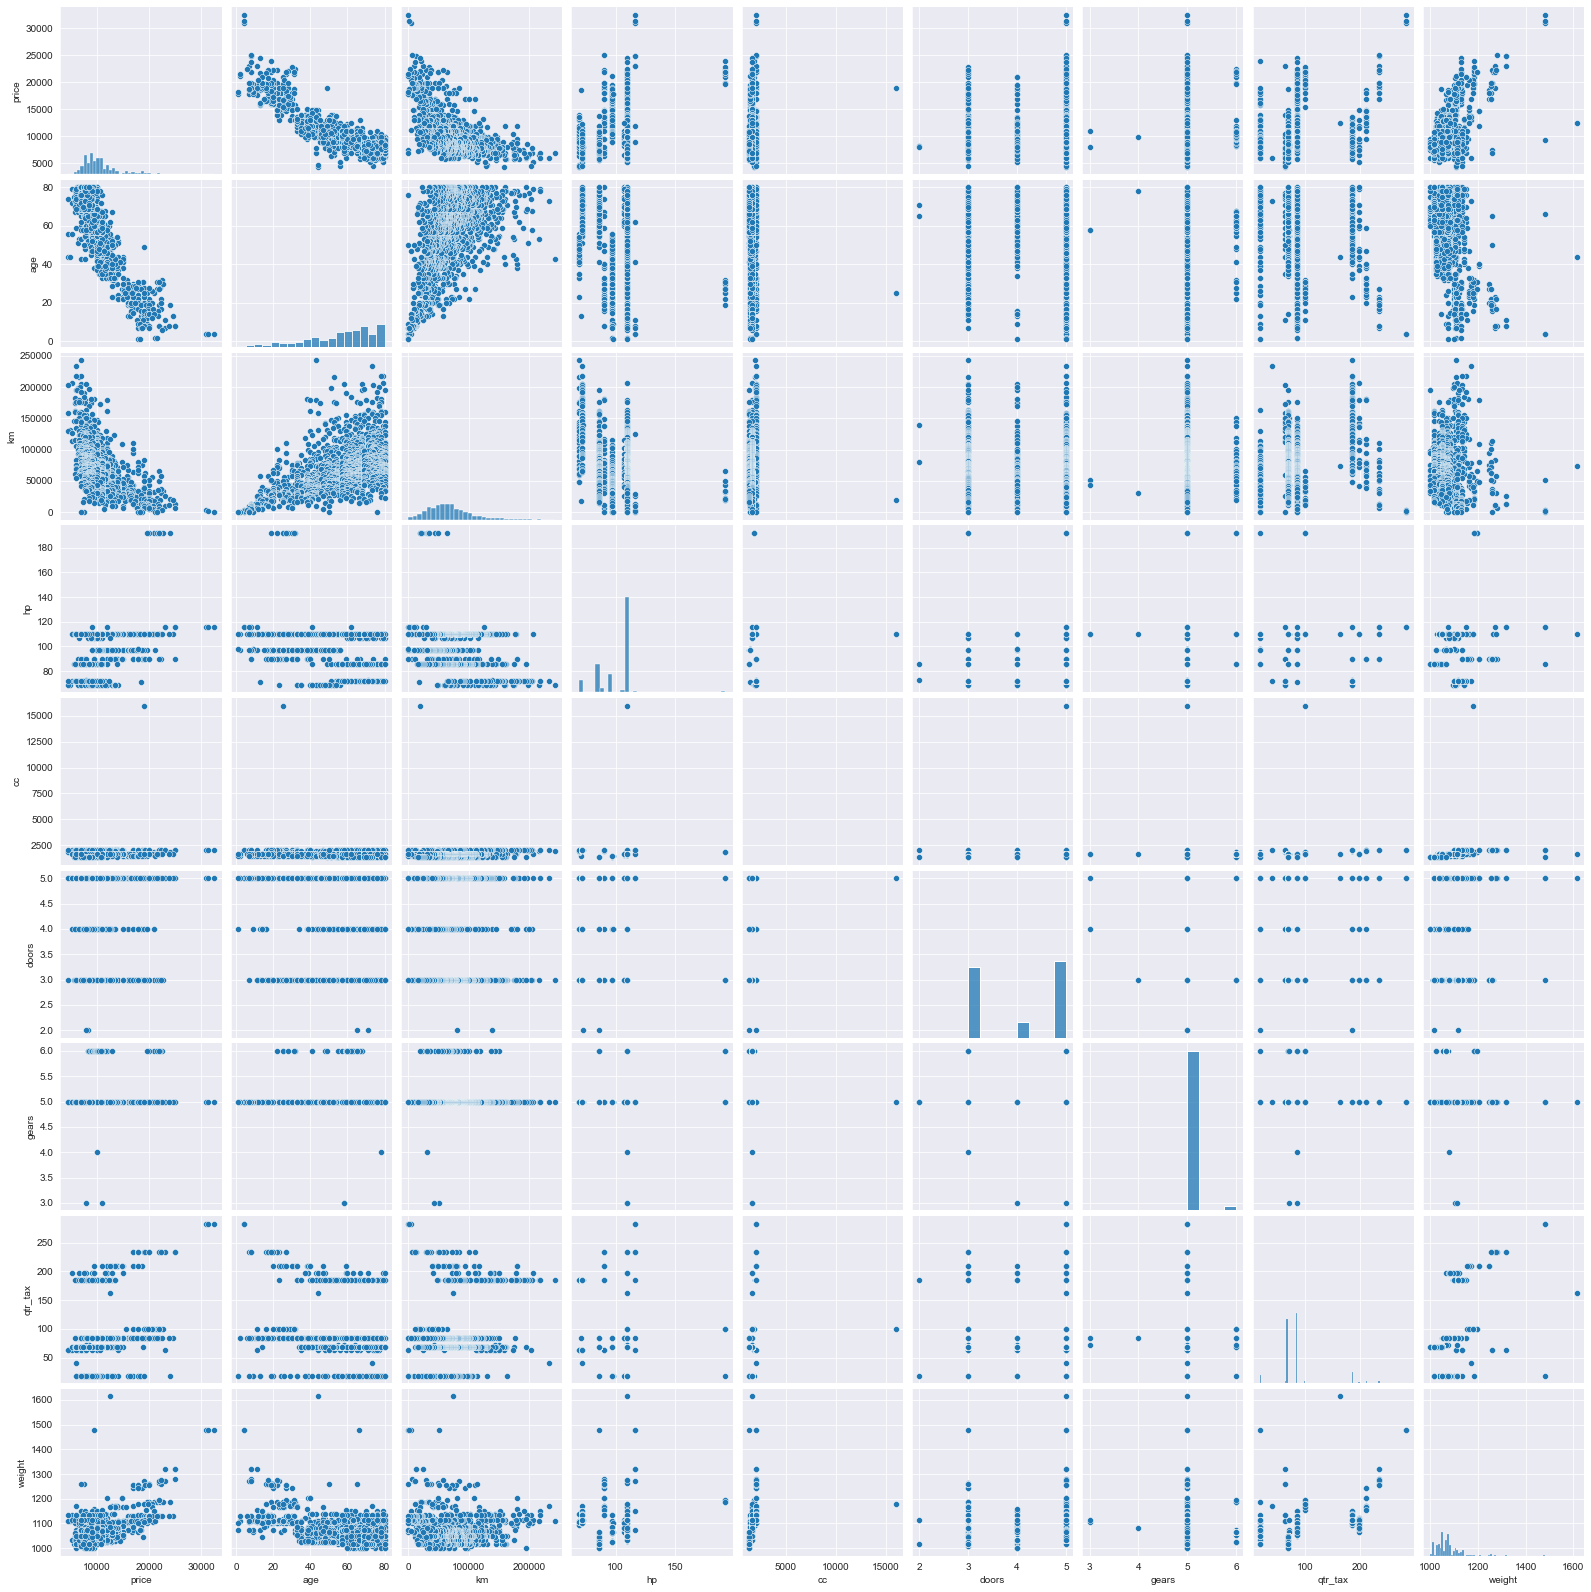

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(data) #I can validate my previous autocorellation notions from the pair plot

In [6]:
#EDA_report= pp.ProfileReport(data)
#EDA_report.to_file(output_file='report_startups.html') 
# Report reveals no null values 
# There is high correlation between profit and r&d_spend
# There is correlation between r&d_spend and mkt_spend which is not ideal.

# Preparing a model

### Using Statsmodels

In [7]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=data).fit()
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:58:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears        594.3199    197.055      3.016      0.003     207.771     980.869
qtr_tax        3.9491      1.310      3.015      0.003       1.379       6.519
weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Inferences

The model summary reveals that it has a farely good value of R-Square around 86.3%. The model could be further improved. 
It is also noted that the p-value for doors is relatively high which means we have to accept the null hypothesis for the doors. The variable doors does not affect Price in any way. The same is observed in the case of cc too. 

So we should remove cc and doors from the modeling process. 

# Simple Linear Regression models 

We can try a number of SLR models to determine the f-statistics for each variable.


In [8]:
# trying out a new model with rd_spend and profit
model2 = smf.ols('price~age',data=data).fit()
model2.summary() # Age contributes to about 76.8% RSquare value which is quite high for a single variable. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:58:00   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# trying out a new model with km alone
model3 = smf.ols('price~km',data=data).fit()
model3.summary() #R-value is around 32.5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          1.76e-124
Time:                        20:58:00   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
km            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# trying out a new model with hp alone
model4 = smf.ols('price~hp',data=data).fit()
model4.summary() #R-value is too poor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.93e-34
Time:                        20:58:00   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
hp            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# trying out a new model with weight alone
model5 = smf.ols('price~weight',data=data).fit()
model5.summary() #R-value is too poor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          1.63e-130
Time:                        20:58:00   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Combinations of MLRs

In [12]:
# trying out a new model with age and km
model6 = smf.ols('price~age+km',data=data).fit()
model6.summary()
# They both together contribute about 79% only. We need to try more combinations to determine the best Model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:58:00   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
km            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Model with age+km+hp+gears+qtr_tax+weight
model7 = smf.ols('price~age+km+hp+weight',data=data).fit()
model7.summary() #R-value is pretty good
#Removing gears and qtr_tax makes slightly decreases the r-value by 0.2% and minute difference in AIC. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:58:00   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
km            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
hp            30.2119      2.539     11.897      0.000      25.230      35.193
weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Variance Inflation Factor

In [14]:
rsq_age = smf.ols('age~km+hp+gears+qtr_tax+weight',data=data).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('km~age+hp+gears+qtr_tax+weight',data=data).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('hp~age+km+gears+qtr_tax+weight',data=data).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_gears = smf.ols('gears~age+km+hp+qtr_tax+weight',data=data).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_qtr_tax = smf.ols('qtr_tax~age+km+hp+gears+weight',data=data).fit().rsquared  
vif_qtr_tax = 1/(1-rsq_qtr_tax) 

rsq_weight = smf.ols('weight~age+km+hp+gears+qtr_tax',data=data).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 

# Storing vif values in a data frame
d1 = {'Variables':['age','km','hp','gears','qtr_tax','weight'],'VIF':[vif_age,vif_km,vif_hp,vif_gears,vif_qtr_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.884335
1,km,1.746492
2,hp,1.400460
3,gears,1.058932
4,qtr_tax,2.263600
5,weight,2.297072


# Residual Analysis

### Test for Normality of residuals (QQ-Plots) -Model7

In [15]:
model7.resid.head()

0   -3055.144943
1   -2295.276927
2   -2586.360171
3   -1217.949137
4   -2207.560290
dtype: float64

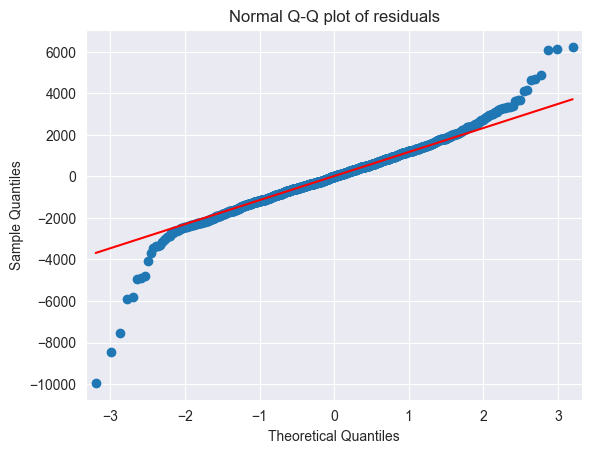

In [16]:
import statsmodels.api as sm
qqplot1=sm.qqplot(model7.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show() #It's almost normal except for a few outliers

### Residual Plot for Homoscedasticity - Model7

In [17]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

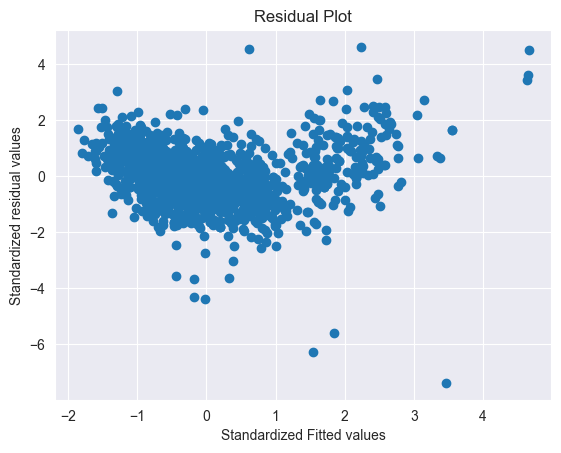

In [18]:
plt.scatter(get_standardized_values(model7.fittedvalues),
            get_standardized_values(model7.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show() #the distribution is concentrated about the mean. There are a number of outliers which could be removed.

### Residual vs Regressors - Model7

eval_env: 1


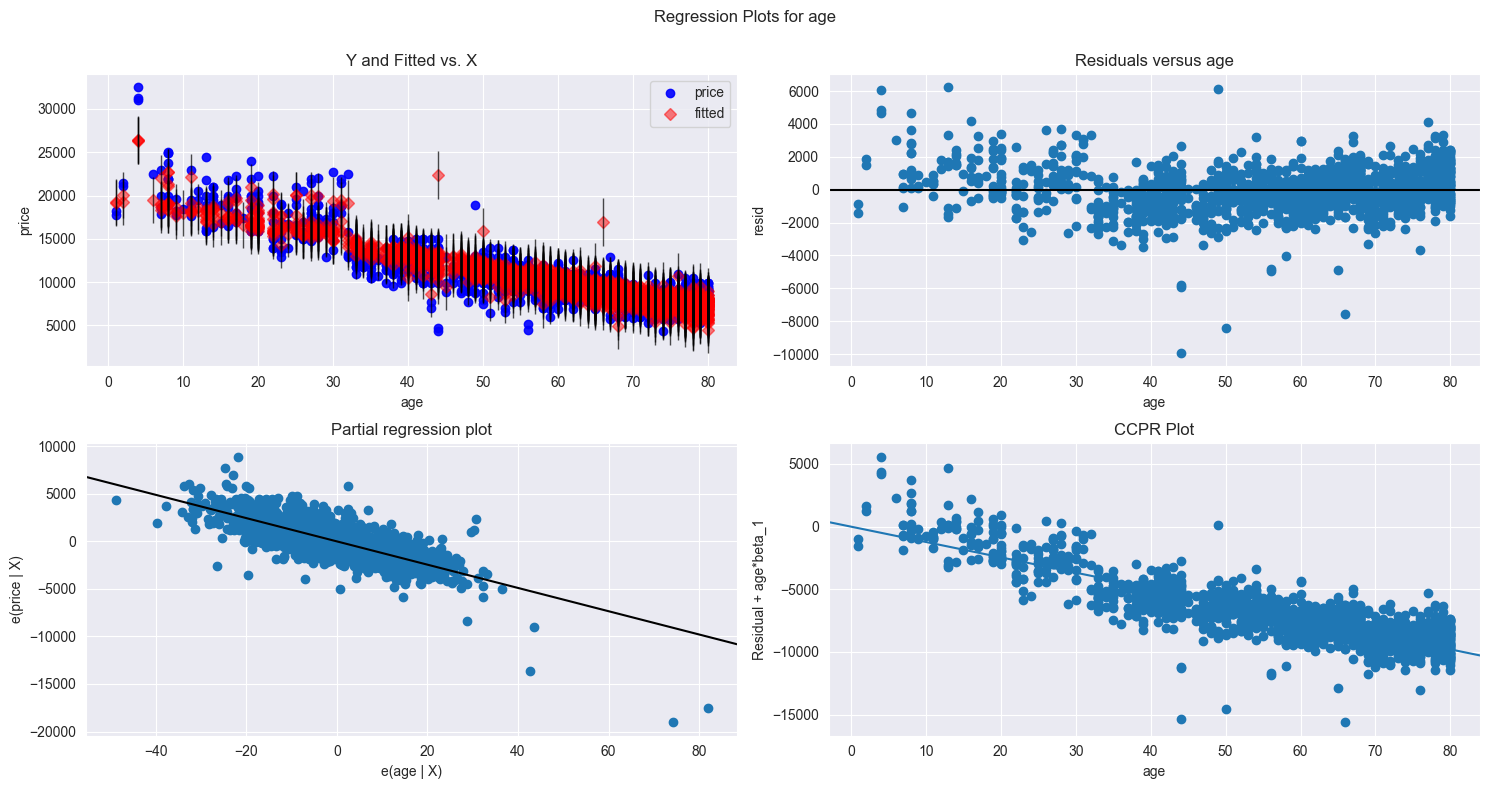

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "age", fig=fig)
plt.show()

eval_env: 1


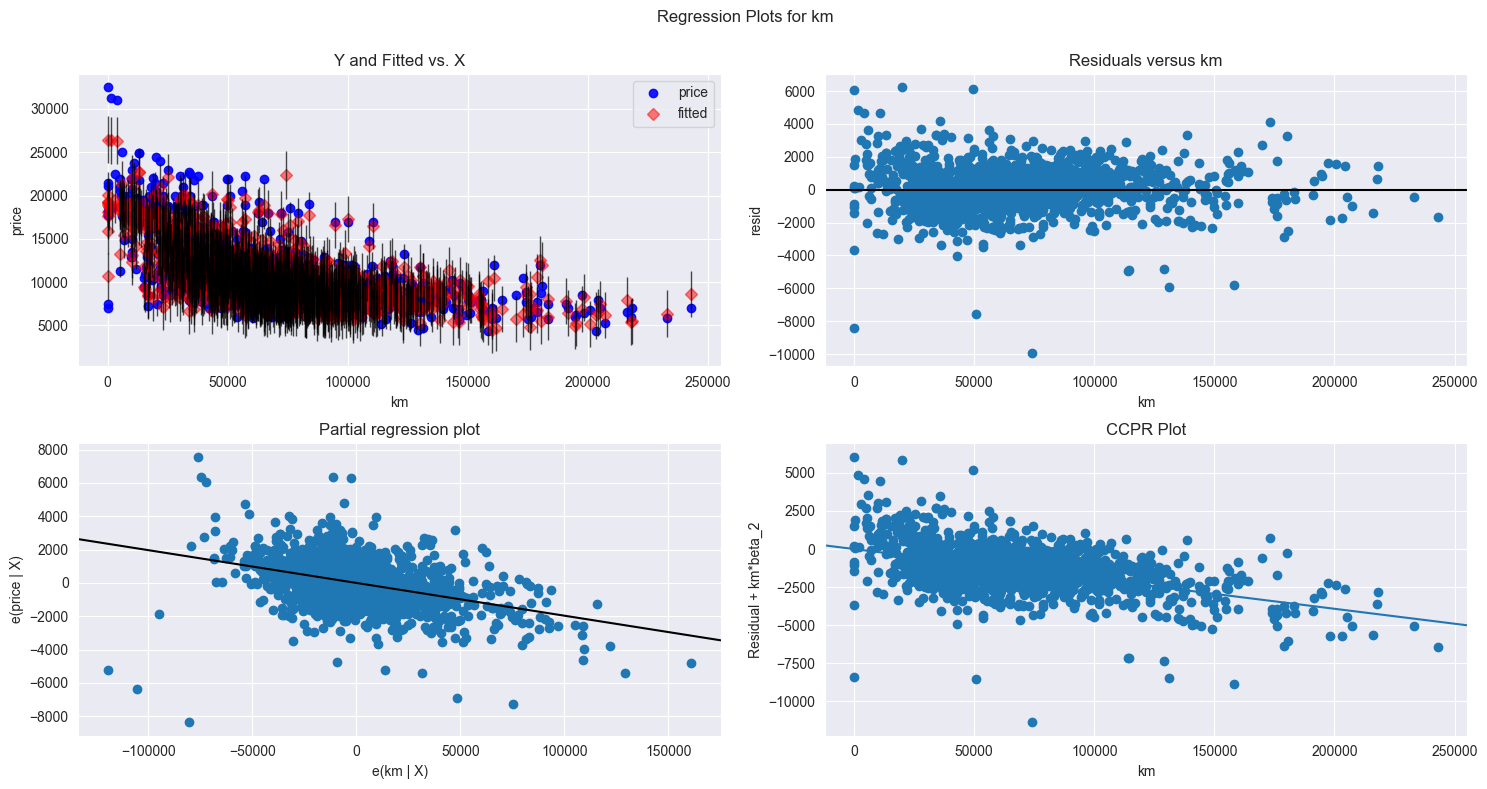

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "km", fig=fig)
plt.show()

eval_env: 1


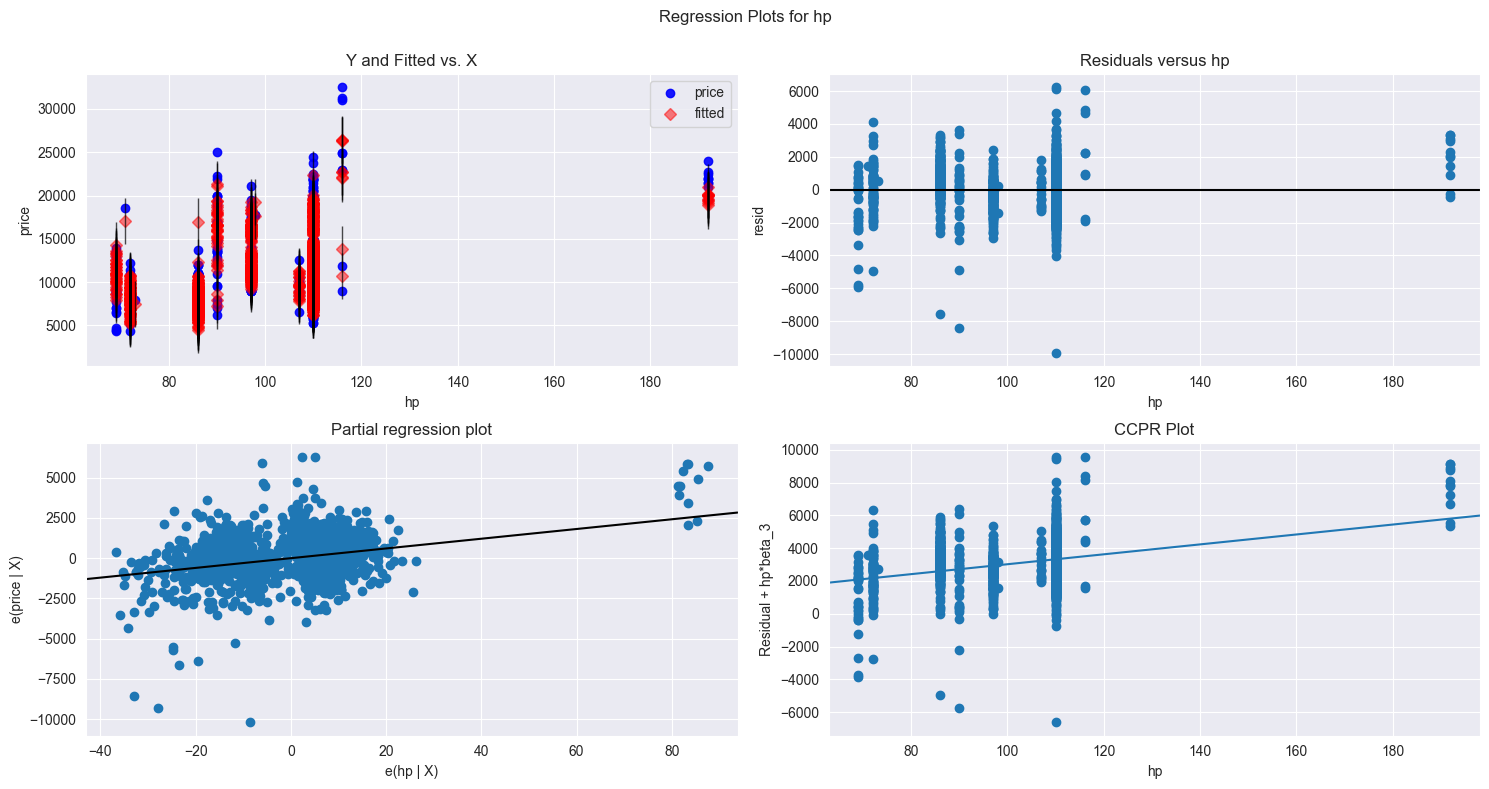

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "hp", fig=fig)
plt.show() 

eval_env: 1


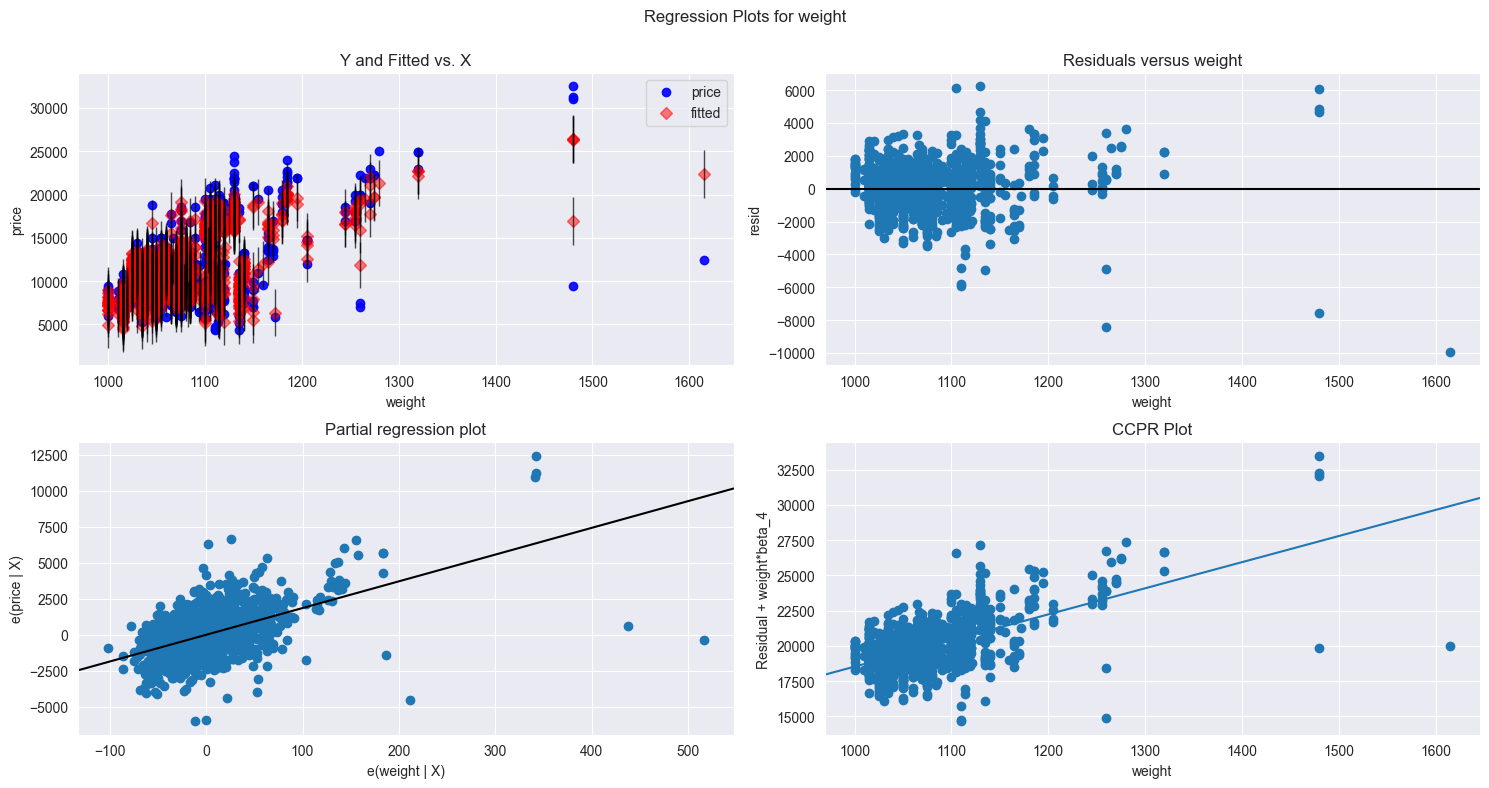

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model7, "weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

### Detecting Influences

### Cook's Distance -Model7

In [23]:
model_influence = model7.get_influence()
(c, _) = model_influence.cooks_distance

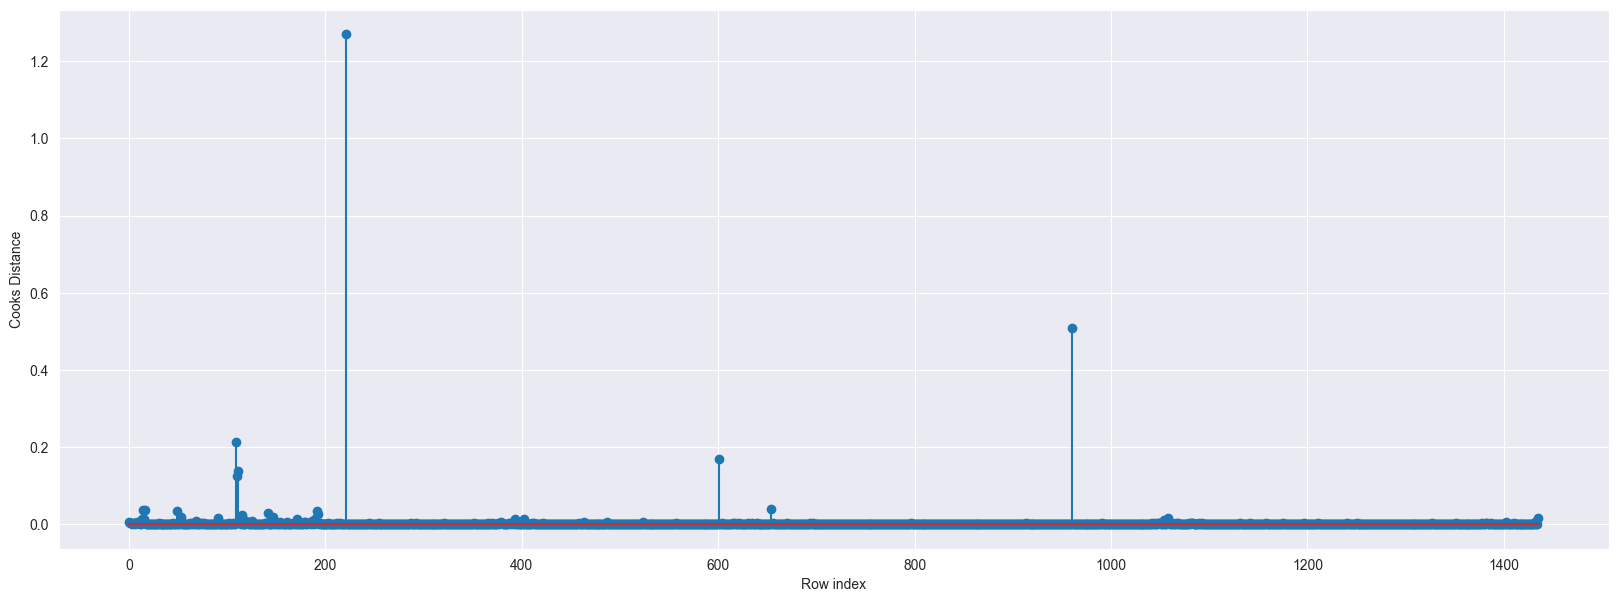

In [24]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() #There are two extreme values in the stem plot. 
#Those values need to be removed.

In [25]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(221, 1.269940010958348)

### High Influence points Model7

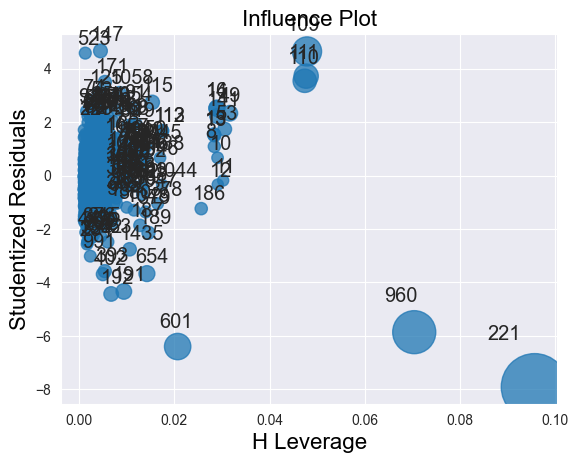

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model7)
plt.show()

The points 221, 960 pose a problem and needs to be removed

In [27]:
data[data.index.isin([221,960])]

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


### Dropping outliers 

In [28]:
data_clean = data.copy()
data_clean = data_clean.drop(data_clean.index[[221,960]],axis=0).reset_index()
data_clean=data_clean.drop(['index','cc','doors','gears','qtr_tax'],axis=1)
data_clean.rename(columns={'Price':'price','Age_08_04':'age', 'KM':'km', 'HP':'hp','Weight':'weight' }, inplace = True)
data_clean.head()

,price,age,km,hp,weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


# Building final Model

We will make the final model with cleaned data and model4 variables.

In [29]:
flv_model = smf.ols('price~age+km+hp+weight',data=data_clean).fit()
flv_model.summary() 
#Best value of R-Square. AIC values have come down. R-square value is approx 87% which is good.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2425.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:58:15   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1429   BIC:                         2.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7912.0770    976.375     -8.104      0.000   -9827.360   -5996.794
age         -116.2934      2.599    -44.754      0.000    -121.391    -111.196
km            -0.0213      0.001    -18.097      0.000      -0.024      -0.019
hp            28.7916      2.455     11.730      0.000      23.977      33.607
weight        22.0984      0.846     26.124      0.000      20.439      23.758
==============================================================================
Omnibus:                      122.446   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.478
Skew:                          -0.201   Prob(JB):                    6.77e-136
Kurtosis:                       6.203   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for any Influences in final model

### Cook's distance

In [30]:
model_influence_x = flv_model.get_influence()
(c_V, _) = model_influence_x.cooks_distance

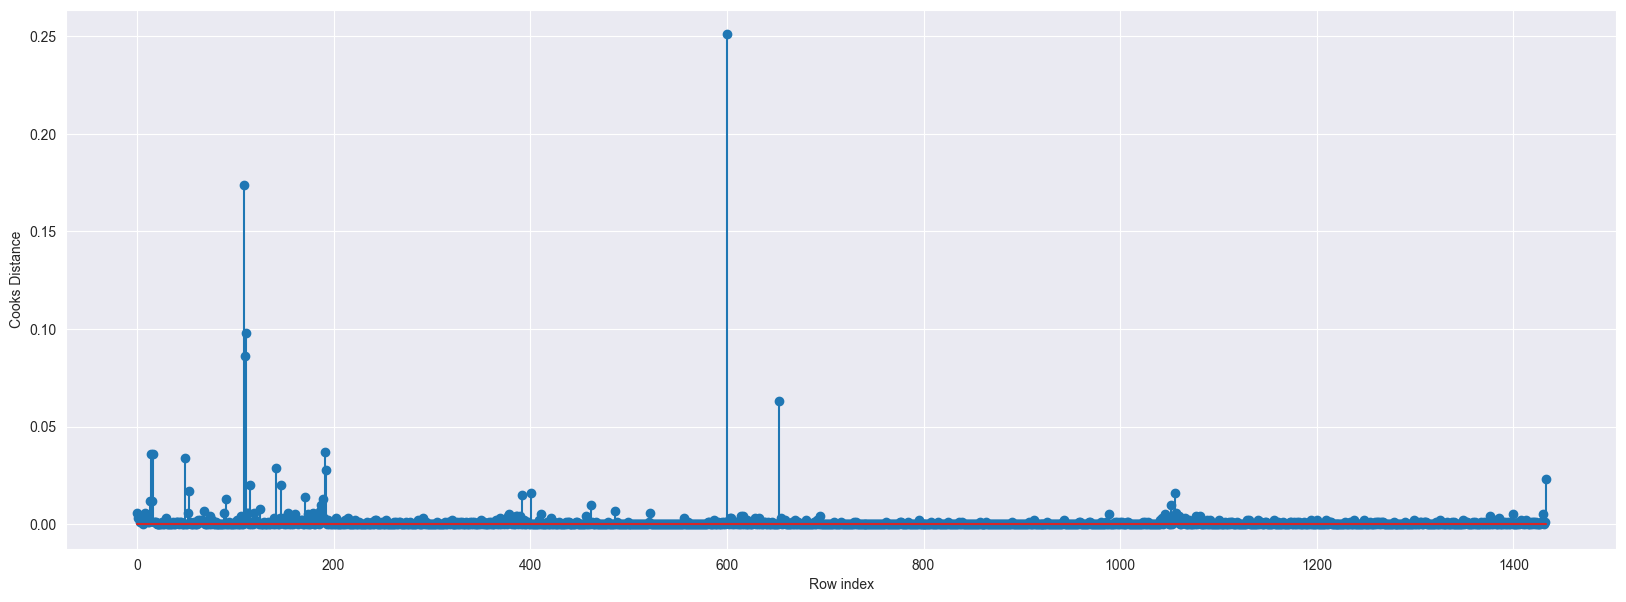

In [31]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_clean)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

#values are good and below 0.5. minor outliners in this case are okay

# Predicting new values

In [32]:
#New data for prediction
p_data1=pd.DataFrame({'age':20,'km':56000,'hp':200,'weight':1200},index=[1])
p_data1

,age,km,hp,weight
1,20,56000,200,1200


In [33]:
flv_model.predict(p_data1)

1    20846.82805
dtype: float64

In [34]:
flv_model.predict(data_clean.iloc[0:5,])

0    16749.232919
1    16197.046132
2    16745.181249
3    16378.776752
4    16226.236434
dtype: float64

In [35]:
predicted_values = flv_model.predict(data_clean)
data_clean["predicted_prices"] = pd.Series(predicted_values)
data_clean.head() #To see how much actual profits vary from predicted prices

,price,age,km,hp,weight,predicted_prices
0,13500,23,46986,90,1165,16749.232919
1,13750,23,72937,90,1165,16197.046132
2,13950,24,41711,90,1165,16745.181249
3,14950,26,48000,90,1165,16378.776752
4,13750,30,38500,90,1170,16226.236434


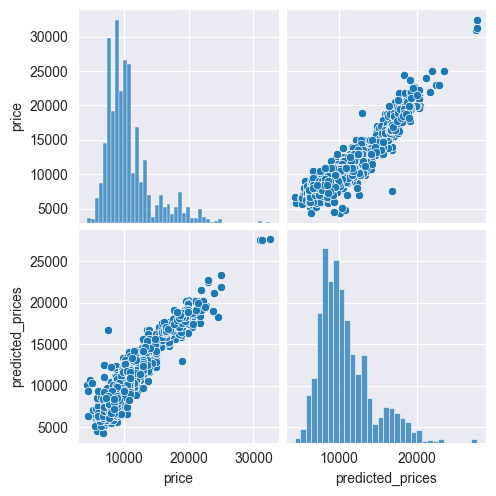

In [36]:
sns.pairplot(data_clean[['price','predicted_prices']]) #Almost linear. so Values are predicted almost correctly. 